In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
# Importing data
df = pd.read_csv('../data/train.csv')
df_val = pd.read_csv('../data/val.csv')

In [22]:
# Convert all categorical features to numerical ones.
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical = pd.DataFrame()
df_numerical[numerical_features] = df[numerical_features]
df_numerical['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical[feature] = df[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df[feature])))
    for value in values:
        df_numerical[feature+"_"+value] = df[feature].map(lambda x: 1 if x==value else 0)
df_numerical['Body_Level'] = df['Body_Level']

In [23]:
# Convert all categorical features to numerical ones. (for validation set)
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
df_numerical_val = pd.DataFrame()
df_numerical_val[numerical_features] = df_val[numerical_features]
df_numerical_val['Gender'] = df_val['Gender'].map({"Female" : 0, "Male" : 1})
binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
for feature in binary_categorical_features:
    df_numerical_val[feature] = df_val[feature].map({"no" : 0, "yes" : 1})
multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
for feature in multi_categorical_features:
    values = (list(set(df_val[feature])))
    for value in values:
        df_numerical_val[feature+"_"+value] = df_val[feature].map(lambda x: 1 if x==value else 0)
df_numerical_val['Body_Level'] = df_val['Body_Level']

In [28]:
features = list(df_numerical.columns.array)
features.reverse()
label = features.pop(0)
features.reverse()
# An extra step done for the validation set since it may not contain all the categories of a specific attribute due to its smaller size.
for feature in features:
    if feature not in list(df_numerical_val.columns.array):
        df_numerical_val[feature] = 0

In [42]:
# Hyperparmeters:
max_iter=500

In [43]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


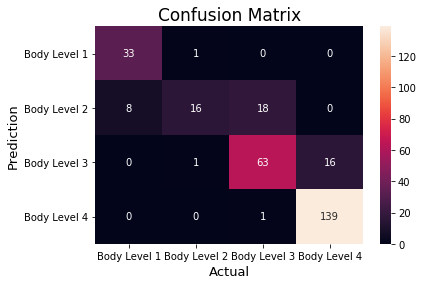

In [44]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [45]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-score  :", F1_score)
print("Support  :", support)

Accuracy   : 0.847972972972973
Precision : [0.80487805 0.88888889 0.76829268 0.89677419]
Recall    : [0.97058824 0.38095238 0.7875     0.99285714]
F1-score  : [0.88       0.53333333 0.77777778 0.94237288]
Support  : [ 34  42  80 140]
